In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

## Sums of Independent Random Variables ##

For two random variables $X$ and $Y$, the additivity property $E(X+Y) = E(X) + E(Y)$ is true regardless of the dependence or independence of $X$ and $Y$. 

But variance doesn't behave quite like this. Let's look at an example.

### Two Rolls of a Die ###
Suppose a die is rolled two times. Let $D_1$ and $D_2$ be the numbers on Rolls 1 and 2. 

Then $D_1$ and $D_2$ have the same distribution: both are uniform on $1, 2, 3, 4, 5, 6$. So $E(D_1) = E(D_2) = 3.5$.

Define two sums as follows:

- $V = D_1 + D_1$
- $W = D_1 + D_2$

In each case we are adding two random variables that have the uniform distribution on the integers $1$ through $6$.

The two sums also have the same expectation, because by additivity, $E(V) = 7 = E(W)$.

But their distributions are quite different from each other. The possible values of $W$ are the integers 2 through 12, whereas the possible values of $V$ are the even integers $2, 4, 6, 8, 10, 12$.

The figure below show the probability distributions of $V$ and $W$.

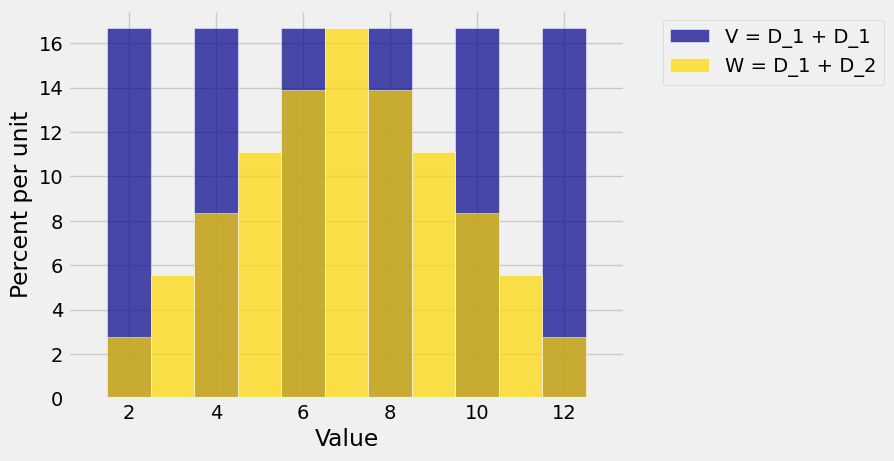

In [2]:
# NO CODE

faces = np.arange(1, 7)
dist_twice_D1 = Table().values(2*faces).probabilities((1/6)*np.ones(6))
k = np.arange(2, 13)
probs_S = np.append(np.arange(1, 7), np.arange(5, 0, -1))/36
dist_S = Table().values(k).probabilities(probs_S)
Plots('V = D_1 + D_1', dist_twice_D1, 'W = D_1 + D_2', dist_S)

The figure shows that the distribution of $V$ (the blue histogram) has a larger spread than that of $W$ (the gold histogram). Both distributions are centered at 7 but the blue distribution has more mass on the extreme values.

Clearly, this difference in spread is connected with the fact that $W = D_1 + D_2$ is the sum of two *independent* rolls of a die whereas $V = D_1 + D_1$ is just twice the first roll.

To see why dependence matters when you are thinking about variance, notice that if $D_1$ is large then $V$ must be large but $W$ can be moderate if $D_2$ is small. The variability of the sum depends on the relation between the two variables being added.

### Adding Independent Random Variables ###

It [can be shown](http://prob140.org/textbook/content/Chapter_13/00_Variance_Via_Covariance.html) that 

$$
Var(X + Y) ~ = ~ Var(X) + Var(Y) ~~~ \text{ if } X \text{ and } Y \text{ are independent}
$$

In this course, the proof isn't of primary importance. It is more important for you to understand that unlike expectation, variance is not additive in general. Additivity of variance is true if the random variables being added are independent of each other.

### Sums of IID Random Variables ###

The most important application of the formula above is to the sum of a random sample. Let $X_1, X_2, \ldots, X_n$ be i.i.d. with expectation $\mu$ and SD $\sigma$.

Let $S_n = X_1 + X_2 + \ldots + X_n$.

We already know that by additivity of expectation,

$$
E(S_n) ~ = ~ n\mu
$$

By our new result about the variance of a sum of independent random variables, we have

$$
Var(S_n) ~ = ~ Var(X_1) + Var(X_2) + \cdots + Var(X_n) = n\sigma^2
$$

Therefore

$$
SD(S_n) ~ = ~ \sqrt{n}\sigma
$$

Notice that the expectation of the sample sum $S_n$ grows linearly in $n$, but the SD grows slower. In later section we will study some important consequences of this property.

In our example about two rolls of a die, the random variable $W = D_1 + D_2$ is the sum of two i.i.d. random variables. So we can apply our new formula to find its SD.

Because $D_1$ is uniform on the integers $1$ through $6$, we know from an [earlier section](ch6.2)  that $SD(D_1) = 1.71$; this number is correct to two decimal places.

Thus $SD(W) = \sqrt{2}\times1.71$.

But $SD(V) = SD(D_1 + D_1) = SD(2D_1) = 2SD(D_1) = 2\times1.71$.

This agrees with what we had concluded earlier based on the probability histograms of $V$ and $W$: the spread of $V$ is greater than that of $W$.

### SD of the Binomial ###

Let $X$ have the binomial $(n, p)$ distribution. We know that $E(X) = np$. We can now find $SD(X)$ as well.

Recall that to find $E(X)$ we said that as $X$ is the number of successes in $n$ independent Bernoulli $(p)$ trials,

$$
X ~ = ~ I_1 + I_2 + \cdots + I_n
$$

where $I_j$ is the indicator of success on Trial $j$.

The distribution of $I_1$ is given by

|value|$0$|$1$|
|---:|:---:|:---:|
|**probability**|$(1-p)$|$p$|

Hence 

- $E(I_1) = p$
- $E(I_1^2) = 0^2(1-p) + 1^2p = p$
- $Var(I_1) = p - p^2 = p(1-p) = pq$ where $q = 1-p$
- $SD(I_1) = \sqrt{pq}$

Now $X$ is the sum of $n$ *independent* indicators, each with the same distribution as $I_1$. 

So $SD(X) = \sqrt{n}\sqrt{pq} = \sqrt{npq}$.

Thus if $X$ has the binomial $(n, p)$ distribution, then $E(X) = np$ and $SD(X) = \sqrt{npq}$.

For example, if $X$ is the number of heads in 100 tosses of a coin then $X$ has the binomial $(100, 0.5)$ distribution so $E(X) = 50$ and $SD(X) = \sqrt{100 \times 0.5 \times 0.5} = 5$.

The figure below shows the probability histogram of $X$. The red arrow is at $E(X) = 50$ and the red arrows are at $E(X) \pm SD(X)$, that is, at 45 and 55.

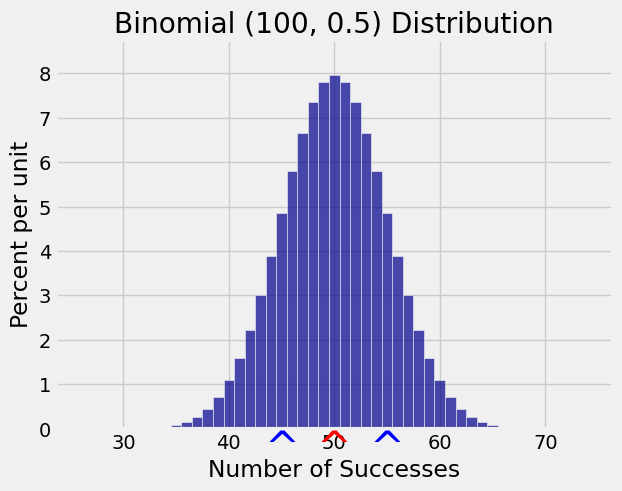

In [3]:
# NO CODE

n = 100
p = 0.5
mu = n*p
sigma = (n*p*(1-p))**0.5
lo = np.floor(mu - 5*sigma)
hi = np.ceil(mu + 5*sigma)
k = np.arange(lo, hi+1)
probs = stats.binom.pmf(k, n, p)
binom_dist = Table().values(k).probabilities(probs)
Plot(binom_dist, show_ev=True, show_sd=True)
plt.title('Binomial (100, 0.5) Distribution')
plt.xlabel('Number of Successes');

### Varying $p$ ###
The function $g(p) = pq = p(1-p)$ is a quadratic function of $p$ and is maximized at $p = 1/2$.

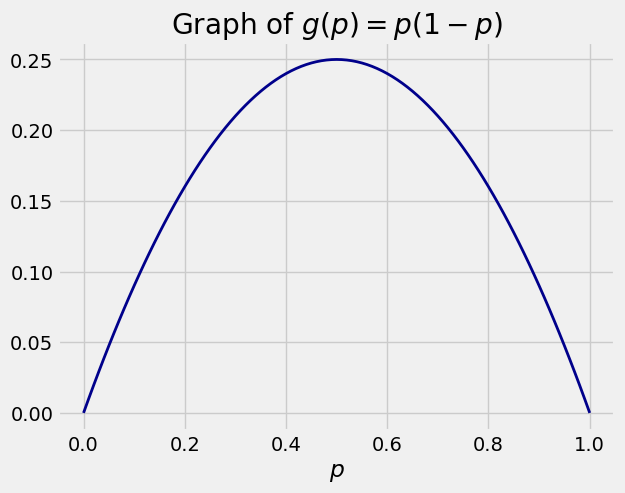

In [4]:
# NO CODE

p = np.arange(0, 1.01, 0.01)
y = p*(1-p)
plt.plot(p, y, lw=2, color='darkblue')
plt.xlabel('$p$')
plt.title('Graph of $g(p) = p(1-p)$');

Since $pq \le 0.25$, we have $\sqrt{pq} \le 0.5$. We will sometimes use $0.5$ as an upper bound for $\sqrt{pq}$ if we don't know $p$.

Because of this bound, we say that the fair coin is the most variable. For example, here are the histograms of the binomial $(10, 0.5)$ and binomial $(10, 0.1)$ distributions. The latter is clearly less spread out.

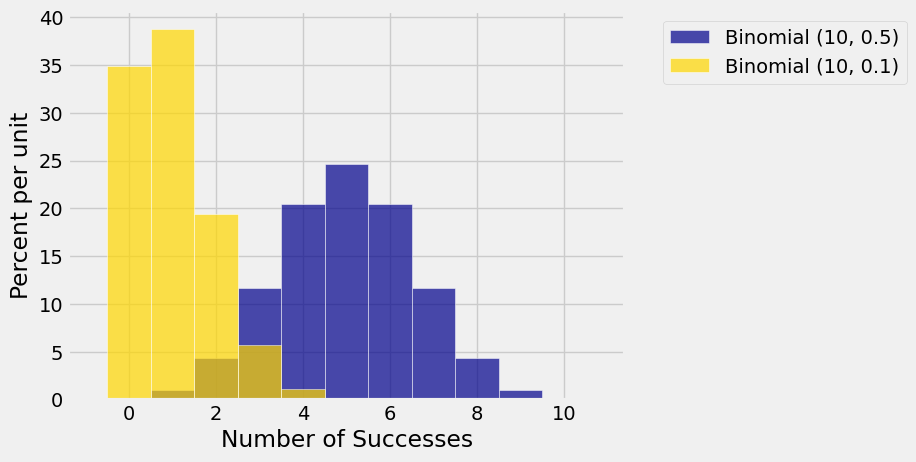

In [5]:
# NO CODE

n = 10
p1 = 0.5
p2 = 0.1
k = np.arange(n+1)
probs1 = stats.binom.pmf(k, n, p1)
binom1_dist = Table().values(k).probabilities(probs1)
probs2 = stats.binom.pmf(k, n, p2)
binom2_dist = Table().values(k).probabilities(probs2)
Plots('Binomial (10, 0.5)', binom1_dist, 'Binomial (10, 0.1)', binom2_dist)
plt.xlabel('Number of Successes');

### SD of the Poisson ###

When random variables can't be easily expressed as sums, SD calculations can get complicated as they involve expectations of squares. For example, if $X$ has the Poisson $(\mu)$ distribution then we showed that $E(X) = \mu$, but the calculation of the SD is more complicated.

So we will just state the result that $SD(X) = \sqrt{\mu}$, and try to understand why that is a reasonable value.

Recall that one way in which the Poisson distribution arises is as an approximation to the binomial $(n, p)$ distribution when $n$ is large and $p$ is small. The parameter of the approximating Poisson distribution is $\mu = np$, obtained by equating means.

Now the SD of the binomial random variable is $\sqrt{npq}$. When $p$ is small, $q$ is close to 1. And so the SD of the binomial random variable is $\sqrt{npq} \approx \sqrt{np} = \sqrt{\mu}$.

### Waiting Till the Tenth Success ###

The SD of a geometric random variable also is requires a bit of calculation. We will just provide it for you and then use it.

Suppose we are running i.i.d. Bernoulli $(p)$ trials, that is, success/failure trials with success probability $p$. Let $T$ be the number of trials required to get the first success. Then: 

- $T$ has the geometric $(p)$ distribution on $1, 2, 3, \ldots $
- $E(T) = 1/p$
- $Var(T) = \frac{q}{p^2}$ and $SD(T) = \frac{\sqrt{q}}{p}$

We won't prove that last fact, but we can use it as in the following example.

Suppose we roll a die until we see a total of 10 sixes. Let $R$ be the number of rolls required. Then

$$
R ~ = ~ X_1 + X_2 + \cdots + X_{10}
$$

where each $X_i$ is the number of trials after the $i-1$th six till we get the $i$th six.

$X_1, X_2, \ldots X_{10}$ are i.i.d. geometric $(1/6)$ random variables, so 

$$
E(R) ~ = ~ 10\cdot\frac{1}{1/6} ~ = ~ 60
$$

and 

$$
SD(R) ~ = ~ \sqrt{10} \cdot \frac{\sqrt{5/6}}{1/6} ~ \approx ~ 17.32
$$

In [6]:
p = 1/6
q = 1 - p
(10**0.5) * (q**0.5) / p

17.320508075688775